# KNN para regresión
- Fuente ejemplo: https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/
- Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- Objetivo: Del ejemplo de KNN de clasificación, tomé otra variable respuesta

Métricas: https://scikit-learn.org/stable/modules/model_evaluation.html


## 1. Cargar librerías y datos

### Librerías

In [32]:
#Manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

#Modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

#Métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [33]:
#Preparación de visualización
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 

### Datos

CSV con reviews de apps

In [34]:
#Datos en estsa misma carpeta
dataframe = pd.read_csv(r"reviews_sentiment.csv",sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


## 2. Comprensión inicial de los datos
### Datos generales

In [35]:
#Descripción general de los datos
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


### Revisión gráfica

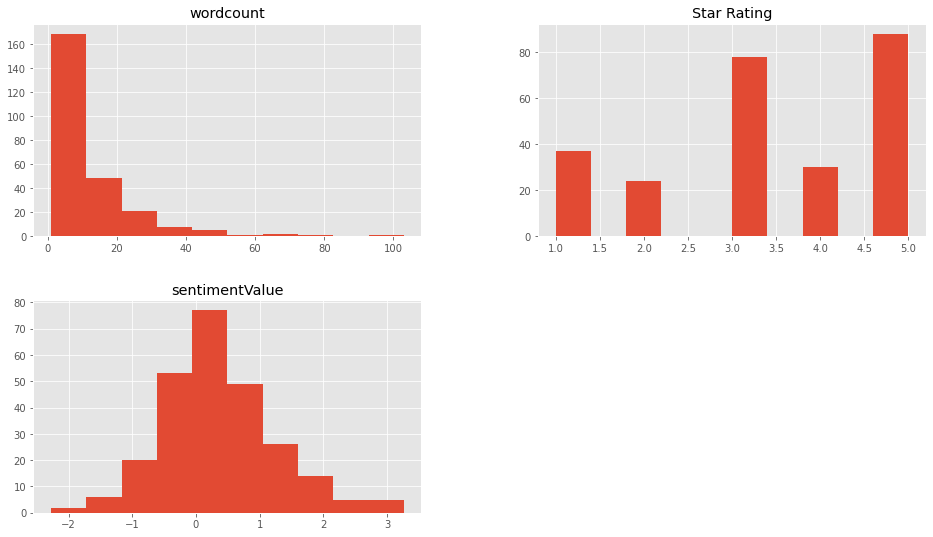

In [36]:
#Histogramas de las variables numéricas
dataframe.hist()
plt.show()

### Revisión por columnas
**Star Rating**

In [37]:
# Revisión de estrellas
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


In [38]:
# Porcentaje por cantidad de estrellas
print((dataframe.groupby('Star Rating').size()/len(dataframe))*100)

Star Rating
1    14.396887
2     9.338521
3    30.350195
4    11.673152
5    34.241245
dtype: float64


C:\Users\auxis\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\auxis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


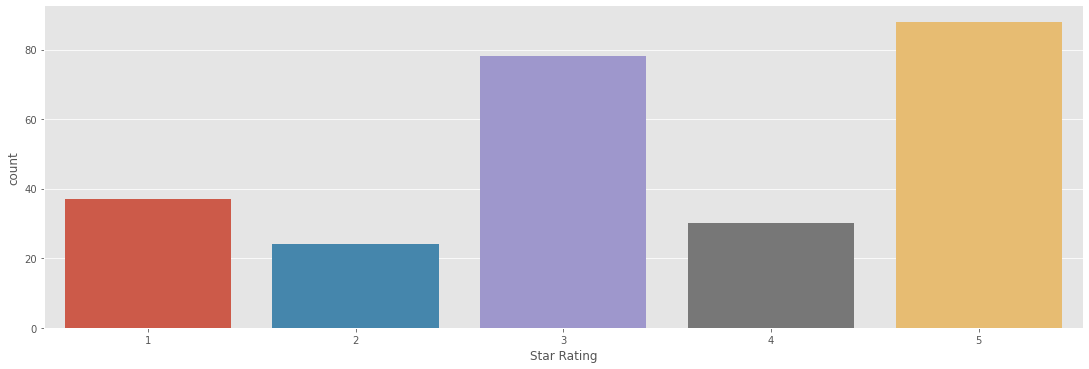

In [39]:
#Graficamente
sb.factorplot('Star Rating',data=dataframe,kind="count", aspect=3)

**WordCount**

C:\Users\auxis\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\auxis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


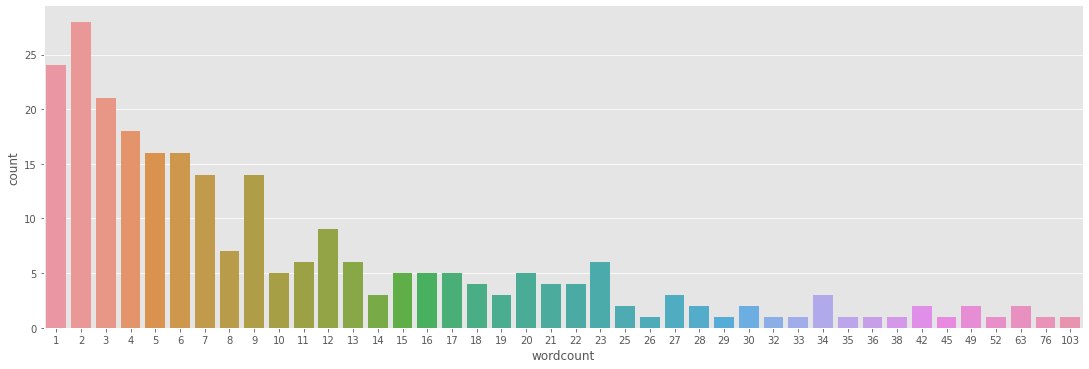

In [40]:
sb.factorplot('wordcount',data=dataframe,kind="count", aspect=3)

**SentimentValue**

<AxesSubplot:>

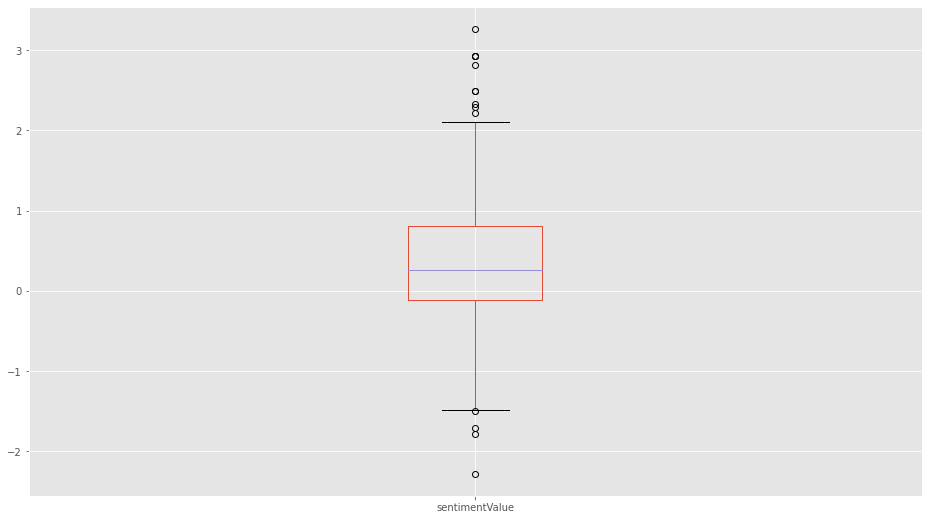

In [41]:
dataframe[['sentimentValue']].boxplot()

## 3. Peparación de DataFrame

### DataFrame definitivo

In [42]:
#X: variables independientes
X = dataframe[['wordcount','Star Rating']].values
#primeros 10 valores
print(X[0:10,])

#Variable respuesta, dependiente
y = dataframe['sentimentValue'].values
#primeros 10 valores
print(y[0:10,])

[[23  1]
 [20  1]
 [ 4  1]
 [17  1]
 [ 6  1]
 [ 8  1]
 [23  1]
 [16  1]
 [21  1]
 [13  1]]
[-0.48638925 -0.58618747 -0.60224027 -0.61627121 -0.6517836  -0.72044293
 -0.72682541 -0.73676947 -0.7652837  -0.79796123]


### Train-Test split

In [43]:
#División del DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Train shape")
print("X_train:" + str(X_train.shape))
print("y_train:" + str(y_train.shape))
print("Test shape")
print("X_test:" + str(X_test.shape))
print("y_test:" + str(y_test.shape))


Train shape
X_train:(192, 2)
y_train:(192,)
Test shape
X_test:(65, 2)
y_test:(65,)


### Estandarización
MinMaxScaler

In [44]:
#Estandarización
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train")
print(X_train[0:10,])
print("Test")
print(X_test[0:10,])

Train
[[0.01333333 1.        ]
 [0.82666667 0.25      ]
 [0.06666667 0.5       ]
 [0.12       0.75      ]
 [0.10666667 1.        ]
 [0.01333333 1.        ]
 [0.         1.        ]
 [0.04       0.5       ]
 [0.33333333 0.        ]
 [0.02666667 0.5       ]]
Test
[[0.02666667 1.        ]
 [0.08       0.        ]
 [0.14666667 0.75      ]
 [0.22666667 0.5       ]
 [0.26666667 0.75      ]
 [0.12       1.        ]
 [0.06666667 0.5       ]
 [0.02666667 1.        ]
 [0.02666667 0.5       ]
 [0.21333333 0.75      ]]


## 4. Modelo
KNN Regressor

### 4.1 Modelo default
KNN con K=5

#### Entrenamiento

In [45]:
#Entrenamiento del modelo
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [46]:
#Score: Coeficiente de determinación r^2
neigh.score(X_train, y_train)

0.6850112340536298

In [47]:
#Vecinos y distancias
vecinos,distancia = neigh.kneighbors(X=X_train, n_neighbors=5, return_distance=True)
print("X_train")
print(X_test[0:5,])
print("vecinos")
print(vecinos[0:5,])
print("distancias")
print(distancia[0:5,])

X_train
[[0.02666667 1.        ]
 [0.08       0.        ]
 [0.14666667 0.75      ]
 [0.22666667 0.5       ]
 [0.26666667 0.75      ]]
vecinos
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.14666667 0.17333333 0.18666667]
 [0.         0.         0.         0.01333333 0.01333333]
 [0.         0.01333333 0.01333333 0.02666667 0.02666667]
 [0.         0.         0.         0.         0.        ]]
distancias
[[ 20 171   5   0 188]
 [  1  52  44  28  68]
 [152  63   2  37 107]
 [  3  58  38 136  78]
 [ 48   4 157  72 109]]


#### Predicción

In [48]:
#Aplicación del modelo a prueba
predicciones = neigh.predict(X_test)
predicciones

array([ 1.31777421, -0.81488433,  0.65092117,  0.02356087,  0.65720781,
        0.94815585,  0.0067388 ,  1.31777421,  0.09910098,  0.9568884 ,
        0.65720781,  1.62127899,  0.0067388 ,  1.22484401,  0.73691756,
        0.04880435,  0.89307191,  1.62127899,  1.22484401, -0.01845434,
        0.94815585,  0.0067388 ,  1.62127899,  1.02498379, -0.01605251,
        1.31777421, -0.81762151,  0.0119411 ,  1.62127899, -0.11611882,
        1.62127899, -0.17500063,  0.02182371,  0.94815585,  0.95110393,
        0.9568884 ,  1.31777421, -0.85222092, -0.78957161,  1.62127899,
        0.04880435, -0.79890767,  0.95110393,  1.62127899, -0.10788004,
        0.0758313 ,  1.31777421,  0.09910098,  0.02356087,  0.65092117,
        0.05345402,  1.62127899,  0.94815585,  0.02356087,  0.09910098,
        0.99358683,  1.11802003, -0.72013802,  0.95110393, -0.8435979 ,
        0.73691756, -0.79890767, -0.77600673, -0.78957161,  1.11802003])

In [49]:
#Score: Coeficiente de determinación r^2
neigh.score(X_test, y_test)

0.4726431988330574

#### Tabla resultados

In [50]:
tabla = pd.DataFrame(X_test)
#renombrar columnas
tabla = tabla.set_axis(['wordcount','Star prediction'], axis=1)
#Agregar y_verdaderas
tabla['sentimentValue'] = y_test
#Agregar y de predicción
tabla['sentiment prediction'] = predicciones
tabla['T/F'] = tabla['sentiment prediction']==tabla['sentimentValue']
tabla

,wordcount,Star prediction,sentimentValue,sentiment prediction,T/F
0,0.026667,1.00,0.335548,1.317774,False
1,0.080000,0.00,-0.396850,-0.814884,False
2,0.146667,0.75,0.502011,0.650921,False
3,0.226667,0.50,0.104674,0.023561,False
4,0.266667,0.75,0.581934,0.657208,False
...,...,...,...,...,...
60,0.320000,0.75,0.808384,0.736918,False
61,0.040000,0.00,-0.256026,-0.798908,False
62,0.200000,0.00,-0.736769,-0.776007,False
63,0.226667,0.00,-0.493784,-0.789572,False


In [51]:
#Cantidad verdader/falso
print(tabla['T/F'].value_counts())

#Proporción verdader/falso
print(((tabla['T/F'].value_counts())/len(tabla))*100)

False    65
Name: T/F, dtype: int64
False    100.0
Name: T/F, dtype: float64


### 4.2 Modelo iteración
KNN con K=7

#### Entrenamiento

In [52]:
#Aplicación del modelo para entrenar
n_neighbors = 7

knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [53]:
##Score: Coeficiente de determinación r^2
print('r^2 of K-NN regressor on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

r^2 of K-NN regressor on training set: 0.71


#### Predicción

In [54]:
#Aplicación del modelo a la prueba
predicciones = knn.predict(X_test)
predicciones

array([ 1.38689969e+00, -7.64646790e-01,  6.69003628e-01,  4.62070537e-03,
        7.95556036e-01,  9.12949240e-01,  1.65186472e-03,  1.38689969e+00,
        3.32214744e-01,  9.27798074e-01,  7.95556036e-01,  1.78652877e+00,
        1.65186472e-03,  1.13367779e+00,  6.67140730e-01,  3.92007018e-02,
        9.03764802e-01,  1.78652877e+00,  1.13367779e+00,  1.38366529e-02,
        9.12949240e-01,  1.65186472e-03,  1.78652877e+00,  9.27798074e-01,
        3.20211214e-02,  1.38689969e+00, -8.29835364e-01,  4.29714928e-02,
        1.78652877e+00, -1.68970975e-01,  1.78652877e+00, -1.78073458e-01,
        4.21854833e-02,  9.65577040e-01,  8.63043853e-01,  9.27798074e-01,
        1.38689969e+00, -7.64646790e-01, -8.21747200e-01,  1.78652877e+00,
        3.92007018e-02, -9.58663816e-01,  8.63043853e-01,  1.78652877e+00,
       -1.23132200e-01,  7.53599057e-02,  1.38689969e+00,  3.32214744e-01,
       -6.13353831e-02,  6.69003628e-01,  6.32571032e-02,  1.78652877e+00,
        9.65577040e-01,  

In [55]:
#Score: r^2 of K-NN regressor on
print('r^2 of K-NN regressor on test set: {:.3f}'
     .format(knn.score(X_test, y_test)))

r^2 of K-NN regressor on test set: 0.433


#### Métricas de error

In [56]:
#Error cuadrado: Mean squared error regression loss
mean_squared_error(y_test, predicciones) 

0.420815858023357

In [57]:
#Varianza explicada
explained_variance_score(y_test, predicciones) 

0.47070595613546307

## 5. Mejor K
Iteración de los valores k

In [58]:
k_variation = pd.DataFrame(k_range)
k_variation['r^2'] = scores
k_variation

,0,r^2
0,1,0.157202
1,2,0.322446
2,3,0.386573
3,4,0.472783
4,5,0.472643
5,6,0.428131
6,7,0.433277
7,8,0.449899
8,9,0.455685
9,10,0.427460
